# Set up

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.25.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# Setting the dimensions and the MFPT results for each model and molecular format

# Semi-axis b for each model
human_b = 0.8885    # cm
monkey_b = 0.67825  # cm
rabbit_b = 0.588    # cm
rat_b = 0.255       # cm
mouse_b = 0.13552   # cm

# Axial length for each model (including lens thickness and anterior chamber depth)
human_al = 2.30  # cm
monkey_al = 1.841  # cm
rabbit_al = 1.631  # cm
rat_al = 0.572  # cm
mouse_al = 0.30727  # cm

# Anterior chamber depth (ACD)
human_ACD = 0.3276  # cm
monkey_ACD = 0.309  # cm
rabbit_ACD = 0.234  # cm
rat_ACD = 0.062  # cm
mouse_ACD = 0.03623  # cm

# Lens thickness (LT)
human_LT = 0.3909  # cm
monkey_LT = 0.351  # cm
rabbit_LT = 0.66  # cm
rat_LT = 0.387  # cm
mouse_LT = 0.216  # cm

# MFPT for Fab molecule (P_m)
human_mfpt_fab = 8.4387      # days
monkey_mfpt_fab = 5.9374     # days
rabbit_mfpt_fab = 4.3164     # days
rat_mfpt_fab = 0.67       # days
mouse_mfpt_fab = 0.20    # days

# MFPT for IgG molecule (P_m)
human_mfpt_igg = 14.122      # days
monkey_mfpt_igg = 10.029     # days
rabbit_mfpt_igg = 7.3203     # days
rat_mfpt_igg = 1.18       # days
mouse_mfpt_igg = 0.36    # days

b = np.array([human_b, monkey_b, rabbit_b, rat_b, mouse_b])
AL = np.array([human_al, monkey_al, rabbit_al, rat_al, mouse_al])
vit_depth = np.array([human_al - human_ACD - human_LT,
                      monkey_al - monkey_ACD - monkey_LT,
                      rabbit_al - rabbit_ACD - rabbit_LT,
                      rat_al - rat_ACD - rat_LT,
                      mouse_al - mouse_ACD - mouse_LT])
mfpt_fab = np.array([human_mfpt_fab, monkey_mfpt_fab, rabbit_mfpt_fab, rat_mfpt_fab, mouse_mfpt_fab])
mfpt_igg = np.array([human_mfpt_igg, monkey_mfpt_igg, rabbit_mfpt_igg, rat_mfpt_igg, mouse_mfpt_igg])

data_fab = {'Species': ['Human', 'Monkey', 'Rabbit', 'Rat', 'Mouse'],
        'Semi-axis b (cm)': b,
        'Axial length (cm)': AL,
        'Vitreous depth (cm)': vit_depth,
        'b² (cm²)': b**2,
        '(Axial length)² (cm²)': AL**2,
        '(Vitreous depth)² (cm)': vit_depth**2,
        'MFPT': mfpt_fab}
data_igg = {'Species': ['Human', 'Monkey', 'Rabbit', 'Rat', 'Mouse'],
        'Semi-axis b (cm)': b,
        'Axial length (cm)': AL,
        'Vitreous depth (cm)': vit_depth,
        'b² (cm²)': b**2,
        '(Axial length)² (cm²)': AL**2,
        '(Vitreous depth)² (cm)': vit_depth**2,
        'MFPT': mfpt_igg}

df_fab = pd.DataFrame(data=data_fab)
df_fab['Format'] = 'Fab'
df_igg = pd.DataFrame(data=data_igg)
df_igg['Format'] = 'IgG'

rh_fab = 3.0  # nm
rh_igg = 5.0  # nm
df_fab['b² Rh'] = b**2 * rh_fab
df_igg['b² Rh'] = b**2 * rh_igg
df_fab['AL² Rh'] = AL**2 * rh_fab
df_igg['AL² Rh'] = AL**2 * rh_igg
df_tot = pd.concat([df_fab, df_igg])

df = pd.concat([df_fab, df_igg])

# Figure of MFPT as a function of vitreous chamber depth

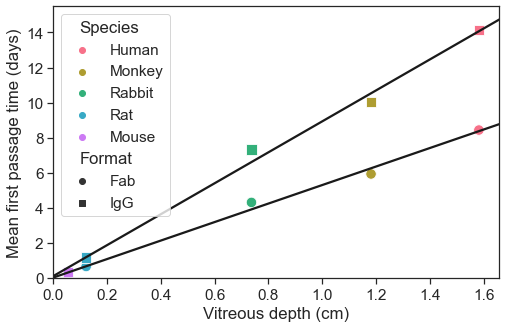

In [3]:
# Figure with regression lines unrestricted

sns.set_theme(style="ticks", font_scale=1.4)
sns.set_palette("husl",5)
markers = {"Fab": "o", "IgG": "s"}

g = sns.scatterplot(data=df, x='Vitreous depth (cm)', y='MFPT', hue='Species', style='Format', markers=markers, s=110)
g1 = sns.regplot(data=df_fab, x='Vitreous depth (cm)', y='MFPT', ci=None, label='Fab', scatter=False, line_kws=dict(color="k"), truncate=False)
g2 = sns.regplot(data=df_igg, x='Vitreous depth (cm)', y='MFPT', ci=None, label='IgG', scatter=False, line_kws=dict(color="k"), truncate=False)
plt.xlabel('Vitreous depth (cm)')
plt.ylabel('Mean first passage time (days)')
plt.xlim(left=0)
plt.ylim(bottom=0)

g.figure.set_size_inches(8, 5)

New slope for Fab: 5.304490601656128


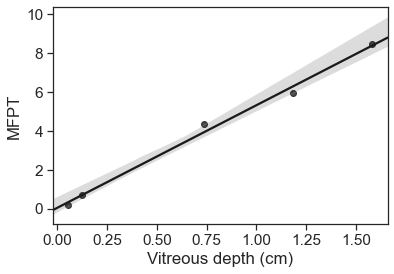

In [4]:
# Calculation of the slope of the regression line of Fab
p = sns.regplot(data=df_fab, x='Vitreous depth (cm)', y='MFPT', fit_reg=True, truncate=False, color='k')
x = np.array(p.get_lines()[0].get_xdata()).reshape(-1, 1)
y = np.array(p.get_lines()[0].get_ydata()).reshape(-1, 1)

# Forcing the regression line to go through the origin:
model = LinearRegression(fit_intercept=False)
model.fit(x,y)
slope_Fab = model.coef_[0][0]
print('New slope for Fab:', slope_Fab)

New slope for IgG: 8.923992241191995


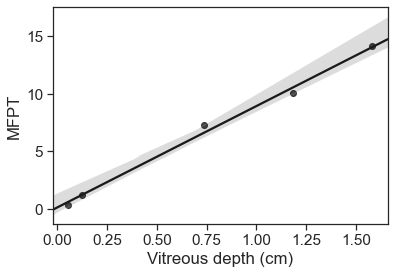

In [5]:
# Calculation of the slope of the regression line of IgG
p2 = sns.regplot(data=df_igg, x='Vitreous depth (cm)', y='MFPT', fit_reg=True, truncate=False, color='k')
x = np.array(p2.get_lines()[0].get_xdata()).reshape(-1, 1)
y = np.array(p2.get_lines()[0].get_ydata()).reshape(-1, 1)

# Forcing the regression line to go through the origin:
model = LinearRegression(fit_intercept=False)
model.fit(x,y)
slope_IgG = model.coef_[0][0]
print('New slope for IgG:', slope_IgG)

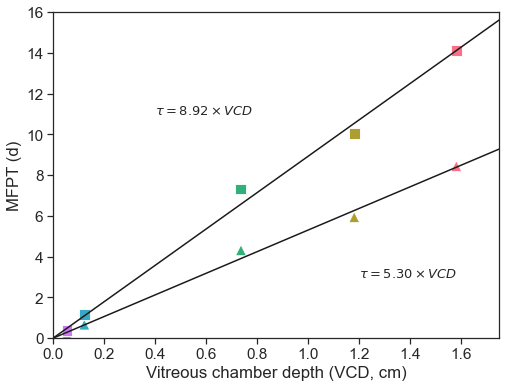

In [6]:
# New plot, including equations of regression lines (without legend)
sns.set_theme(style="ticks", font_scale=1.4)
sns.set_palette("husl",5)
markers = {"Fab": "^", "IgG": "s"}

g1 = plt.plot([0, 1.75],[0, 1.75*slope_Fab], color='k')
g2 = plt.plot([0, 1.75], [0, 1.75*slope_IgG], color='k')
g = sns.scatterplot(data=df, x='Vitreous depth (cm)', y='MFPT', hue='Species', style='Format', markers=markers, s=120, legend=None, alpha=1)
plt.xlabel('Vitreous chamber depth (VCD, cm)')
plt.ylabel('MFPT (d)')
plt.xlim(left=0, right=1.75)
plt.ylim(bottom=0, top=16)
plt.text(0.4,11, r'$\tau = 8.92 \times VCD$', fontsize=13)
plt.text(1.2,3, r'$\tau = 5.30 \times VCD$', fontsize=13)

g.figure.set_size_inches(8, 6)

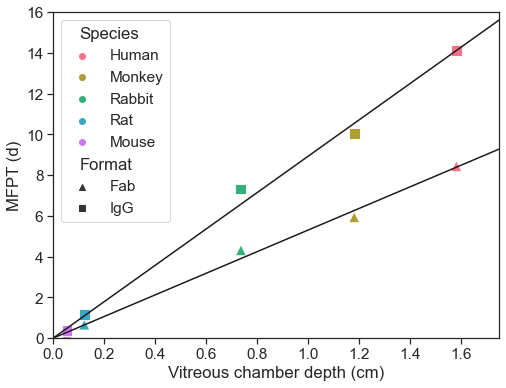

In [7]:
# New plot, including the legend
sns.set_theme(style="ticks", font_scale=1.4)
sns.set_palette("husl",5)
markers = {"Fab": "^", "IgG": "s"}

g1 = plt.plot([0, 1.75],[0, 1.75*slope_Fab], color='k')
g2 = plt.plot([0, 1.75], [0, 1.75*slope_IgG], color='k')
g = sns.scatterplot(data=df, x='Vitreous depth (cm)', y='MFPT', hue='Species', style='Format', markers=markers, s=120)
plt.xlabel('Vitreous chamber depth (cm)')
plt.ylabel('MFPT (d)')
plt.xlim(left=0, right=1.75)
plt.ylim(bottom=0, top=16)


g.figure.set_size_inches(8, 6)

# Figure MFPT as a function of b²Rh

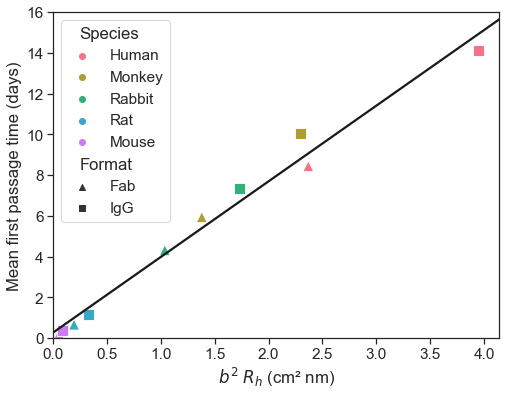

In [8]:
# Figure with regression lines unrestricted

sns.set_theme(style="ticks", font_scale=1.4)
sns.set_palette("husl",5)
markers = {"Fab": "^", "IgG": "s"}

g = sns.scatterplot(data=df_tot, x='b² Rh', y='MFPT', hue='Species', style='Format', markers=markers, s=120)
g2 = sns.regplot(data=df_tot, x='b² Rh', y='MFPT', scatter=False, ci=None, color='k', truncate=False)
#g2 = sns.regplot(data=df_tot.loc[df_tot['Species'] == 'Human'], x='b² Rh', y='MFPT', scatter=False, ci=None, color='b', truncate=False)
#g3 = sns.regplot(data=df_tot.loc[df_tot['Species'] == 'Monkey'], x='b² Rh', y='MFPT', scatter=False, ci=None, color='orange', truncate=False)
#g4 = sns.regplot(data=df_tot.loc[df_tot['Species'] == 'Rabbit'], x='b² Rh', y='MFPT', scatter=False, ci=None, color='green', truncate=False)
#g5 = sns.regplot(data=df_tot.loc[df_tot['Species'] == 'Rat'], x='b² Rh', y='MFPT', scatter=False, ci=None, color='red', truncate=False)
#g6 = sns.regplot(data=df_tot.loc[df_tot['Species'] == 'Mouse'], x='b² Rh', y='MFPT', scatter=False, ci=None, color='pink', truncate=False)
plt.xlabel('$b^2$ $R_h$ (cm² nm)')
plt.ylabel('Mean first passage time (days)')
plt.xlim(left=0)
plt.ylim(bottom=0, top=16)

g.figure.set_size_inches(8, 6)

New slope: 3.80985093303954


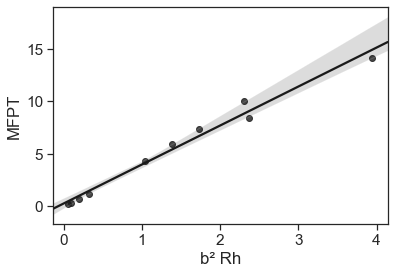

In [9]:
# Calculation of the slope of the regression line
p = sns.regplot(data=df_tot, x='b² Rh', y='MFPT', fit_reg=True, truncate=False, color='k')
x = np.array(p.get_lines()[0].get_xdata()).reshape(-1, 1)
y = np.array(p.get_lines()[0].get_ydata()).reshape(-1, 1)

# Forcing the regression line to go through the origin:
model = LinearRegression(fit_intercept=False)
model.fit(x,y)
slope = model.coef_[0][0]
print('New slope:', slope)

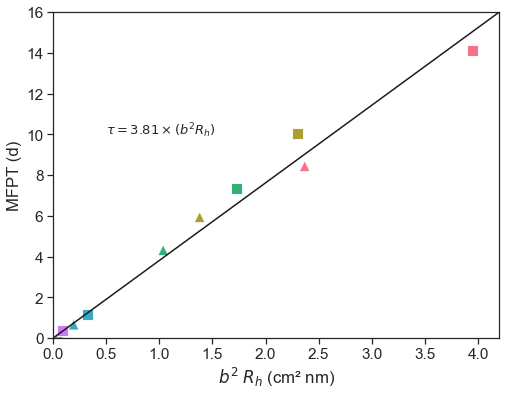

In [10]:
# New plot, including equation of regression line (without legend)
sns.set_theme(style="ticks", font_scale=1.4)
sns.set_palette("husl",5)
markers = {"Fab": "^", "IgG": "s"}

g = sns.scatterplot(data=df_tot, x='b² Rh', y='MFPT', hue='Species', style='Format', markers=markers, s=120, legend=None)
g2 = plt.plot([0, 4.2], [0, 4.2*slope], color='k')
plt.xlabel('$b^2$ $R_h$ (cm² nm)')
plt.ylabel('MFPT (d)')
plt.xlim(left=0, right=4.2)
plt.ylim(bottom=0, top=16)
plt.text(0.5,10, r'$\tau = 3.81 \times (b^2 R_h)$', fontsize=13)

g.figure.set_size_inches(8, 6)

# Additional figures (not presented in paper)

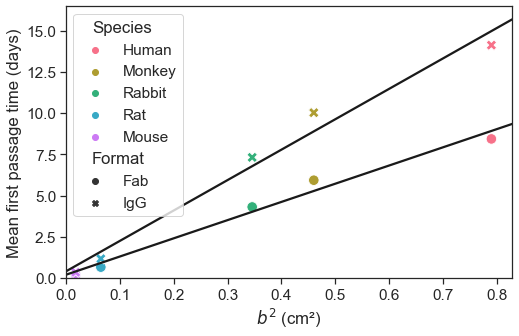

In [11]:
# Plotting MFPT as a function of b²

sns.set_theme(style="ticks", font_scale=1.4)
sns.set_palette("husl",5)

g = sns.scatterplot(data=df, x='b² (cm²)', y='MFPT', hue='Species', style='Format', s=110)
g1 = sns.regplot(data=df_fab, x='b² (cm²)', y='MFPT', ci=None, label='Fab', scatter=False, line_kws=dict(color="k"), truncate=False)
g2 = sns.regplot(data=df_igg, x='b² (cm²)', y='MFPT', ci=None, label='IgG', scatter=False, line_kws=dict(color="k"), truncate=False)
plt.xlabel('$b^2$ (cm²)')
plt.ylabel('Mean first passage time (days)')
plt.xlim(left=0)
plt.ylim(bottom=0)

g.figure.set_size_inches(8, 5)

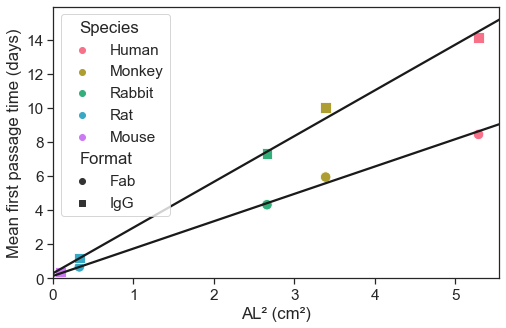

In [12]:
# Plotting MFPT as a function of AL²

sns.set_theme(style="ticks", font_scale=1.4)
sns.set_palette("husl",5)
markers = {"Fab": "o", "IgG": "s"}

g = sns.scatterplot(data=df, x='(Axial length)² (cm²)', y='MFPT', hue='Species', style='Format', markers=markers, s=110)
g1 = sns.regplot(data=df_fab, x='(Axial length)² (cm²)', y='MFPT', ci=None, label='Fab', scatter=False, line_kws=dict(color="k"), truncate=False)
g2 = sns.regplot(data=df_igg, x='(Axial length)² (cm²)', y='MFPT', ci=None, label='IgG', scatter=False, line_kws=dict(color="k"), truncate=False)
plt.xlabel('AL² (cm²)')
plt.ylabel('Mean first passage time (days)')
plt.xlim(left=0)
plt.ylim(bottom=0)

g.figure.set_size_inches(8, 5)

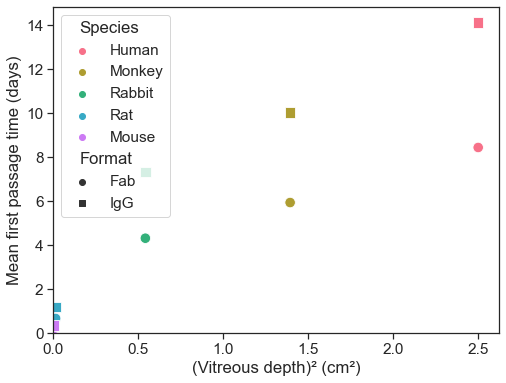

In [13]:
# Plotting MFPT as a function of VCD²

sns.set_theme(style="ticks", font_scale=1.4)
sns.set_palette("husl",5)
markers = {"Fab": "o", "IgG": "s"}

g = sns.scatterplot(data=df, x='(Vitreous depth)² (cm)', y='MFPT', hue='Species', style='Format', markers=markers, s=110)
#g1 = sns.regplot(data=df_fab, x='(Vitreous depth)² (cm)', y='MFPT', ci=None, label='Fab', scatter=False, line_kws=dict(color="k"), truncate=False)
#g2 = sns.regplot(data=df_igg, x='(Vitreous depth)² (cm)', y='MFPT', ci=None, label='IgG', scatter=False, line_kws=dict(color="k"), truncate=False)
plt.xlabel('(Vitreous depth)² (cm²)')
plt.ylabel('Mean first passage time (days)')
plt.xlim(left=0)
plt.ylim(bottom=0)

g.figure.set_size_inches(8, 6)

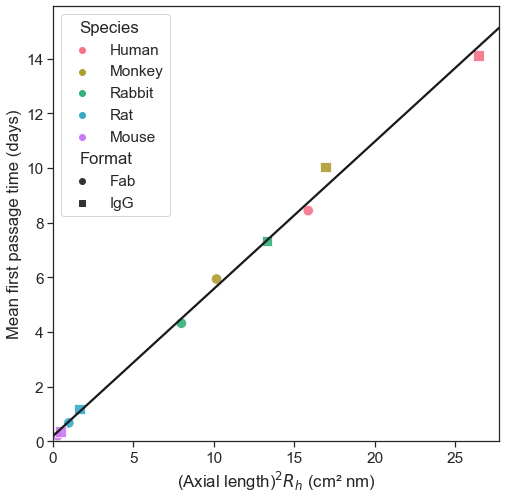

In [14]:
# Plotting MFPT as a function of AL²Rh

sns.set_theme(style="ticks", font_scale=1.4)
sns.set_palette("husl",5)

g = sns.scatterplot(data=df_tot, x='AL² Rh', y='MFPT', hue='Species', style='Format', markers=markers, s=110, alpha=0.9)
g2 = sns.regplot(data=df_tot, x='AL² Rh', y='MFPT', scatter=False, ci=None, color='k', truncate=False)
#g2 = sns.regplot(data=df_tot.loc[df_tot['Species'] == 'Human'], x='b² Rh', y='MFPT', scatter=False, ci=None, color='b', truncate=False)
#g3 = sns.regplot(data=df_tot.loc[df_tot['Species'] == 'Monkey'], x='b² Rh', y='MFPT', scatter=False, ci=None, color='orange', truncate=False)
#g4 = sns.regplot(data=df_tot.loc[df_tot['Species'] == 'Rabbit'], x='b² Rh', y='MFPT', scatter=False, ci=None, color='green', truncate=False)
#g5 = sns.regplot(data=df_tot.loc[df_tot['Species'] == 'Rat'], x='b² Rh', y='MFPT', scatter=False, ci=None, color='red', truncate=False)
#g6 = sns.regplot(data=df_tot.loc[df_tot['Species'] == 'Mouse'], x='b² Rh', y='MFPT', scatter=False, ci=None, color='pink', truncate=False)
plt.xlabel('(Axial length)$^2 R_h$ (cm² nm)')
plt.ylabel('Mean first passage time (days)')
plt.xlim(left=0)
plt.ylim(bottom=0)

g.figure.set_size_inches(8, 8)